# Replicate Bresnahan and Reiss 1991

In this notebook, we will be replicating a classic paper from Industrial Organization: Bresnahan and Reiss (1991) "Entry and Competition in Concentrated Markets." The paper can be downloaded here: http://people.hss.caltech.edu/~mshum/gradio/papers/bresreiss_jpe.pdf

The data is available on the class GitHub page.




## Description of the Data

For a description of the data, see Table 3 of the paper and its accompanying description.

Each observation is a "market." These are combinations of towns and industries, e.g. the tire dealer market in town "A". From p. 985,

> Our sample contains 202 isolated local markets. A typical market
in our sample is a county seat in the western United States. These county seats are separated from other towns in the county. Because most of the local population resides in or near the central town, its population provides a reasonable first approximation to $S(Y)$. 
>
> ...
>
> We selected our sample of markets and industries using criteria developed in our earlier work (see Bresnahan and Reiss 1988, 1990). Briefly, we located towns or small cities in the continental United States that were at least 20 miles from the nearest town of 1,000 people or more. We elimi- nated towns that were near large metropolitan areas or were part of a cluster of towns. Our specific criteria exclude, for example, towns within 100 miles of a city of 100,000. We believe, a priori, that these selection criteria ensure that we can identify all relevant competitors.
>
> ...
> 
> We limited our study to industries or occupations in which we could identify all sellers of a narrowly defined product or service. We did not consider grocery and clothing stores, for example, because they sell a range of products.

The data included on the GitHub repo has 202 rows, including the following variables:

  - `ID`: The unique ID associated with the represented market.
  - `TIRE`: The number of incumbent "tire dealer" firms in the market
  - `TPOP`: Town population.
  - `NGRW`: Negative TPOP growth. This represents the negative growth in town population from 1970 to 1980. 
  - `PGRW`: Positive TPOP growth. Similar to `NGRW`. These growth terms capture entrants' asymmetric expectations about future market growth as well as lags in responses to past growth.
  - `OCTY`: Commuters out of the city. There are commuters out of the county. It represents the Census Bureau's count of county residents who commute to work outside the county. (A negative calue of the coefficient $\lambda_4$ suggest that commuters purchase good in nearby markets.)
  - `OPOP`: Nearby Population. This includes population within 10 miles of the town. (This would increase demand.)
  - `LANDV`: Value per acre of farm-land and buildings  (\$1,000s)
  - `ELD`: 65 years and older divided by the county population
  - `FFRAC`: Fraction of land in farms
  - `PINC`: Per capital income (\$1,000's)
  - `LNHDD`: Log of heating degree days

Note: You can find additional variables used in the paper and their descriptions, along with summary statistics, in Table 2 on p. 991.

In [199]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import scipy.optimize
sns.set()

In [70]:
pd.set_option('precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [71]:
df = pd.read_csv('BresnahanAndReiss1991_DATA.csv')

In [72]:
df.head()

,ID,TIRE,TPOP,NGRW,PGRW,OCTY,OPOP,LANDV,ELD,FFRAC,PINC,LNHDD
0,40013,2,3.54,0.00,0.84,8.39,5.84,1.18,0.12,0.24,7.72,7.27
1,40015,11,9.26,0.00,1.95,2.16,0.59,0.09,0.15,0.29,6.67,7.27
2,40016,10,15.74,0.00,1.30,2.16,0.59,0.09,0.15,0.29,6.67,7.27
3,40017,7,7.92,-0.14,0.00,1.43,1.36,0.11,0.06,1.16,4.49,7.38
4,40018,5,5.28,0.00,0.53,1.43,1.36,0.11,0.06,1.16,4.49,7.38


In [73]:
df.dtypes

ID         int64
TIRE       int64
TPOP     float64
NGRW     float64
PGRW     float64
OCTY     float64
OPOP     float64
LANDV    float64
ELD      float64
FFRAC    float64
PINC     float64
LNHDD    float64
dtype: object

**Figure 2**

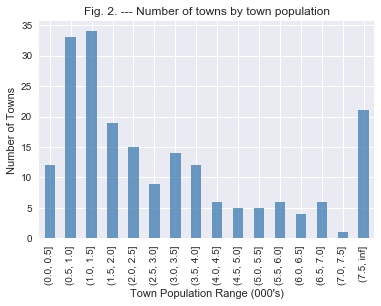

In [121]:
a = pd.cut(df.TPOP, np.r_[np.linspace(0,7.5, 16), [np.inf]])
a = a.value_counts().sort_index()
a.plot.bar(color='steelblue', alpha=.8)
plt.ylabel('Number of Towns')
plt.xlabel("Town Population Range (000's)")
plt.title('Fig. 2. --- Number of towns by town population');

**Table 2**

Market counts by industry and number of incumbents (shown for tire dealers only)

In [75]:
bins = bins = [-np.inf, *range(1,8), np.inf]
counts = pd.cut(df.TIRE, bins, right=False).value_counts().sort_index()
pd.DataFrame(counts).T

,"[-inf, 1.0)","[1.0, 2.0)","[2.0, 3.0)","[3.0, 4.0)","[4.0, 5.0)","[5.0, 6.0)","[6.0, 7.0)","[7.0, inf)"
TIRE,45,39,39,24,13,15,6,21


**Table 3**

Again, this replication only contains some of the variables used.

In [80]:
df.drop('ID', axis=1).aggregate(['mean', 'std', 'min', 'max']).T

,mean,std,min,max
TIRE,2.62,2.63,0.00,13.00
TPOP,3.74,5.35,0.12,45.09
NGRW,-0.06,0.14,-1.34,0.00
PGRW,0.49,1.05,0.00,7.23
OCTY,0.32,0.69,0.00,8.39
OPOP,0.41,0.74,0.01,5.84
LANDV,0.29,0.23,0.07,1.64
ELD,0.13,0.05,0.03,0.30
FFRAC,0.67,0.35,0.00,1.27
PINC,5.91,1.13,3.16,10.50


In [81]:
df.drop('ID', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
TIRE,202.00,2.62,2.63,0.00,1.00,2.00,4.00,13.00
TPOP,202.00,3.74,5.35,0.12,1.05,2.10,4.34,45.09
NGRW,202.00,-0.06,0.14,-1.34,-0.04,0.00,0.00,0.00
PGRW,202.00,0.49,1.05,0.00,0.00,0.08,0.42,7.23
OCTY,202.00,0.32,0.69,0.00,0.08,0.16,0.32,8.39
OPOP,202.00,0.41,0.74,0.01,0.06,0.14,0.42,5.84
LANDV,202.00,0.29,0.23,0.07,0.14,0.24,0.35,1.64
ELD,202.00,0.13,0.05,0.03,0.10,0.13,0.16,0.30
FFRAC,202.00,0.67,0.35,0.00,0.32,0.83,0.94,1.27
PINC,202.00,5.91,1.13,3.16,5.17,5.87,6.68,10.50


## Model Description

Following the structure of equation (4), we assume that 

$$
\Pi_N = S(Y, \lambda) V_N(Z, W, \alpha, \beta) - F_N(W, \gamma) + \epsilon, \tag{8}
$$

where $\lambda$, $\alpha$, $\beta$, and $\gamma$ represent profit function parameters, $Y$ describes market size, $Z$ and $W$ shift per capita demand and costs, and the unobserved error term $\epsilon$ summarizes profits that we do not observer. To simplify the estimation procedure, we assume that $\epsilon$ has a normal distribution that is independently distributed across markets and is independent of our observables. We also assume that $\epsilon$ has zero mean and a constant variance and that each firm within a market has the same profit error. This last assumption presumes that successive entrants' profits differ only through the determinist variables in (8). 

The probability of observing markets with no firms equals

$$
P(\Pi_1 < 0) = 1 - \Phi(\bar \Pi_1),
$$

where $\Phi(\cdot)$ is the cumulative normal distribution function, and $\Pi_1 = \bar \Pi_1 + \epsilon$ equals a monopolist's profits. If $\bar \Pi_1 \geq \bar \Pi_2 \geq ... \geq \bar \Pi_5$, the probability of observing $N$ firms in equilibrium ( $N = 1,2,3, \text{ or } 4$ ) equals

$$
P(\Pi_N \geq 0 \text{ and } \Pi_{N+1} < 0) = \Phi(\bar \Pi_N) - \Phi(\bar \Pi_{N+1}).
$$

The residual probability of observing five or more firms equals

$$
P(\Pi_5 \geq 0) = \Phi(\bar \Pi_5).
$$

Market size is modeled as a linear function of population variables. Specifically, we assume that

$$
S(Y, \lambda) = \text{ TPOP } + \lambda_1 \text{ OPOP } + \lambda_2 \text{ PGRW } + \lambda_2 \text{ NGRW } + \lambda_4 \text{ OCTY }. \tag 9
$$

We set the coefficient of town population is $S(Y, \lambda)$ equal to one because $V_N$ contains a constant term. This normalization translates units of market demand into units of current town population.

We model firms' per capita variable profits, $V_N$ , as a function of the number of firms, $N$, and economic variables, $X = [W, Z].$ We assume that this function has the linear form

$$V_N = \alpha_1 + \mathbf X \beta - \sum_{n=2}^N \alpha_n. \tag{10}$$

The term $V_2 = \alpha_1 + \mathbf X \beta - \sum_{n=2}^N \alpha_n$ equal the per capita variable profit of a monopolist. 

Because we do not have detailed information on costs, we assume

$$ 
F_N = \gamma_1 + \gamma_L W_L + \sum_{n=2}^N \gamma_n.
$$

The term $F_1 = \gamma_1 + \gamma_L W_L$ equals a monopolist's fixed costs. We include the price of agricultural land in it to capital intermarket variation in land costs. The $\gamma_n$ terms allow later entrants to have higher costs. When we observe $\gamma_n$ greater than zero, we conclude that later entrants have higher fixed costs. We do not known, however, whether these higher costs mean that the entran is less efficient (i.e., the supply curve of entrants is upward sloping) or it faces entry barriers.

**What is the log-likelihood function?**

The log-likelihood function $\mathcal L$ is given by

$$
\mathcal L = \sum_{i=1}^I  \left( 
\mathbb 1\{N_i = 0\} \log P \left( \Pi_1^i < 0 \right) + 
\mathbb 1\{N_i \geq 5\} \log P \left(\Pi_5^i \geq 0\right) +
\sum_{j=1}^4 \mathbb 1\{N_i=j\}  \log P \left(\Pi^i_{N_i} \geq 0 \text{ and } \Pi^i_{N_i+1} < 0\right) 
\right), 
$$

$$
$$

for observations $i=1,...,I$. Note that the values of $\Pi^i_{N_i}$ depend on the characteristics of a particular market ($W_i$, $Y_i$, $Z_i$) and the number of incumbents $N_i$ in market $i$.

#### Q1. Write a function for the log-likelihood function.

Write the log-likelihood function as a function of the parameter vector `theta`. Define theta such that theta includes the parameters for $\lambda$, $\beta$, $\alpha$, and $\gamma$ in a single vector. They should be defined such that 

```python
lam = theta[0:4]
beta = theta[4:8]
alpha = theta[8:13]
gamma = theta[13:19]
```

Evaluate the negative log-likelihood function for the parameters `theta_br`, given below. `theta_br` is the vector of parameters as estimated in the Bresnahan and Reiss paper.

```python
theta_br = np.array([-0.53, 2.25, 0.34, 0.23, -0.49, -0.03,
0.004, -0.02, 0.86, 0.03, 0.15, 0, 0.08, 0.53,
0.76, 0.46, 0.6, 0.12, -0.74])
```

In [228]:
def V(df, Ni, alpha=np.ones(5), beta=np.ones(4)):
    """Per-capita variable profit
    
    df: data
    Ni: number of incumbents in market i
    alpha: alpha parameters
    beta: beta parameters
    """
    n = np.min([5, Ni])
#     n = Ni
    a = 0
    for i in range(1,n):
        a = a + alpha[i]
    
    
    Z = np.c_[df.ELD, df.PINC, df.LNHDD, df.FFRAC]
    # Don't use W in the V function for our replication
    # W = df.LANDV
    # X = np.c_[W, Z]

    # X is an I x 4 numpy array, where I is the number of observations
    X = np.c_[Z]
    
    
    profit = alpha[0] + X @ beta - a
    return profit

def F(df, Ni, gamma=np.ones(6)):
    n = np.min([5, Ni])
#     n = Ni
    g = 0
    # gamma 2 through gamma 5 (indices 1 through 4)
    for i in range(1,n):
        g = g + gamma[i]

    fixed_cost = gamma[0] + gamma[5] * df.LANDV + g
    return fixed_cost

def neg_log_lik(theta=np.ones(19), market='TIRE', df=None):
    lam = theta[0:4]
    beta = theta[4:8]
    alpha = theta[8:13]
    gamma = theta[13:19]
    
    Phi = scipy.stats.norm.cdf
    S = (df.TPOP + lam[0] * df.OPOP + lam[1] * df.NGRW + 
         lam[2] * df.PGRW + lam[3] * df.OCTY)
    
    P = [0] * 6
    inner = (1 - Phi(S * V(df, 1, alpha=alpha, beta=beta) - 
                          F(df, 1, gamma=gamma)
                    )
            )
    P[0] = np.log(inner)
    inner = Phi(S * V(df, 5, alpha=alpha, beta=beta) - 
                F(df, 5, gamma=gamma))
    P[5] = np.log(inner)
    for i in range(1,5):
        inner = (Phi(S * V(df, i, alpha=alpha, beta=beta) - 
                              F(df, i, gamma=gamma)) -
                      Phi(S * V(df, i+1, alpha=alpha, beta=beta) - 
                              F(df, i+1, gamma=gamma))
                )
        P[i] = np.log(inner)

        
    for i in range(6):
        P[i][P[i] == -np.inf] = -100000000
    log_lik = 0 
    for i in range(5):
        log_lik = log_lik + np.sum(P[i] * (df[market] == i))
    log_lik = log_lik + np.sum(P[5] * (df[market] >= 5))
    return -log_lik


In [232]:
theta_br = np.array([-0.53, 2.25, 0.34, 0.23, -0.49, -0.03,
0.004, -0.02, 0.86, 0.03, 0.15, 0, 0.08, 0.53,
0.76, 0.46, 0.6, 0.12, -0.74])

In [236]:
neg_log_lik(df=df, theta=theta_br)

C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: RuntimeWarning: divide by zero encountered in log


263.15801951617493

#### Q2. Compute the Maximum Likelihood Estimate

Compute the maximum likelihood estimate of the model using lower bounds on the parameter values for $alpha_i$, i=1,...,5. What happens if you try to compute the maximum likelihood estimate without these bounds?

In [238]:
nll = lambda theta: neg_log_lik(theta=theta, df=df)
out_no_bounds = scipy.optimize.minimize(nll, theta_br, options={'disp':True})

C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: RuntimeWarning: divide by zero encountered in log
C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:57: RuntimeWarning: divide by zero encountered in log
C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: RuntimeWarning: invalid value encountered in log


         Current function value: 262.777890
         Iterations: 27
         Function evaluations: 1177
         Gradient evaluations: 56


C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: RuntimeWarning: divide by zero encountered in log
C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: RuntimeWarning: invalid value encountered in log


In [239]:
out_no_bounds

      fun: 262.7778901090656
 hess_inv: array([[ 1.29530955e-01,  1.33469102e-02, -1.97039706e-02,
        -1.03387620e-01, -5.55436357e-02,  1.26598270e-03,
        -8.64499695e-03,  2.70504788e-03,  7.11637250e-02,
         2.83216218e-03, -6.67961722e-04, -1.77718438e-03,
        -4.18110300e-04,  1.36424327e-02, -5.78815331e-03,
        -1.44944282e-03,  5.54729373e-03,  2.91337296e-03,
        -2.71516727e-02],
       [ 1.33469102e-02,  7.87178335e-01, -6.45098393e-01,
        -5.13784367e-02, -6.09605808e-01, -1.03571458e-04,
         1.11145920e-02,  1.53423958e-02,  7.48375983e-04,
        -1.77181841e-02,  6.17282738e-03,  7.15242206e-03,
         1.45140069e-02, -4.11094143e-02,  2.65557240e-02,
         1.29611032e-02, -2.05378041e-02, -2.65101868e-02,
        -8.08531478e-02],
       [-1.97039706e-02, -6.45098393e-01,  9.05096058e-01,
        -1.28618124e-02,  6.64594476e-01, -4.20445476e-03,
        -8.55951111e-04, -1.95625013e-02, -8.77191920e-02,
         2.28220848e-02

In [240]:
ba = [-np.inf] * 8
bb = [0] * 10
lower_bounds = [*ba, *bb, -np.inf]
upper_bounds = [np.inf] * 19
bounds = list(zip(lower_bounds, upper_bounds))

theta0 = np.ones(19) * 0.1
nll = lambda theta: neg_log_lik(theta=theta, df=df)
out = scipy.optimize.minimize(nll, theta0, bounds=bounds, 
    # options={'disp':True}
    )


C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: RuntimeWarning: divide by zero encountered in log
C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:57: RuntimeWarning: divide by zero encountered in log


In [241]:
out

      fun: 263.0912047584611
 hess_inv: <19x19 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.77919901e-03,  3.36513040e-03,  3.95345978e-02,  4.20641300e-04,
       -4.19504431e-03,  6.73310296e-02,  9.59516910e-02,  5.60419267e-02,
        8.11724021e-03, -1.56319402e-03,  2.50281573e-02,  1.09403970e+01,
        1.70985004e-02,  2.17596607e-02, -3.47881723e-03,  1.42847512e-02,
        2.78816970e-02,  2.36070719e-02, -7.13384907e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 9120
      nit: 373
   status: 0
  success: True
        x: array([-0.53220872,  2.25198225,  0.35619724,  0.22617057, -0.48379506,
       -0.03073494,  0.00369117, -0.02076673,  0.86307438,  0.03535034,
        0.15018282,  0.        ,  0.08020444,  0.53059398,  0.75454484,
        0.46517228,  0.59851215,  0.12112918, -0.73979325])